In [2]:
import pandas as pd

sim = pd.read_json("/Users/massoudmaher/data/9_6_ran_walk.json")

In [3]:
def cast_n_sort(df_dict):
    df = pd.DataFrame(df_dict)
    df.index = df.index.astype("int")
    return df.sort_index()

sim["cn_data"] = [cast_n_sort(x) for x in sim["cn_data"]]
sim["plinkage"] = [cast_n_sort(x) for x in sim["plinkage"]]
sim["clustering"] = [cast_n_sort(x) for x in sim["clustering"]]
#
#display(sim.columns)
print(sim.shape)

(100, 17)


# Example clustering

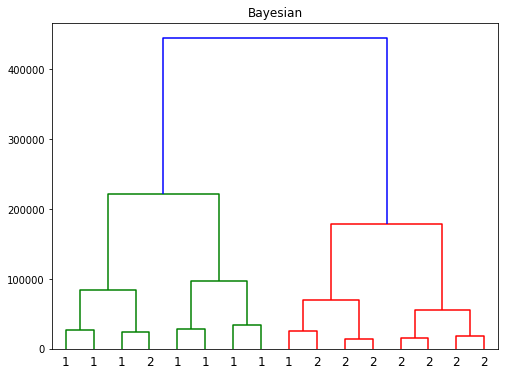

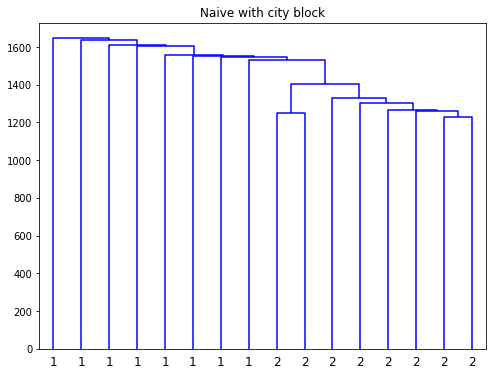

In [4]:
# Bayesian hierarchical
from scipy.cluster.hierarchy import dendrogram
from scgenome.cncluster import bayesian_cluster
from scgenome.simulation import get_plot_data
import matplotlib.pyplot as plt
import numpy as np

eg_ind = 73
cn_data = sim.loc[eg_ind,"cn_data"].copy()
n_states = sim.loc[eg_ind,"max_cn"]
alpha = sim.loc[eg_ind,"alpha"]
bhc_linkage = sim.loc[eg_ind,"plot_data"]
bhc_plinkage = sim.loc[eg_ind,"plinkage"]
naive_linkage = sim.loc[eg_ind,"naive_linkage"]
cluster_ids = list(pd.Series(sim.loc[eg_ind,"cell_id"]).str[2])

fig = plt.figure(figsize=(8, 6))
f = dendrogram(bhc_linkage, labels=cluster_ids)
txt = fig.axes[0].set_title("Bayesian")

fig = plt.figure(figsize=(8, 6))
f = dendrogram(naive_linkage, labels=cluster_ids)
txt = fig.axes[0].set_title("Naive with city block")

In [5]:
all_sim = pd.concat(list(sim["plinkage"]))
all_sim.head()

,i,j,r_merge,naive_dist,log_like,i_count,j_count,merge_count,dist
0,11,13,-14890.627232,45.224836,-24781.466594,1,1,2,14890.627232
1,9,10,-16381.449305,49.137707,-23082.073484,1,1,2,16381.449305
2,8,12,-21697.334288,58.826294,-30489.118412,1,1,2,21697.334288
3,1,5,-23552.146932,60.524124,-35394.695141,1,1,2,23552.146932
4,7,14,-24915.558963,63.414323,-33387.429394,1,1,2,24915.558963


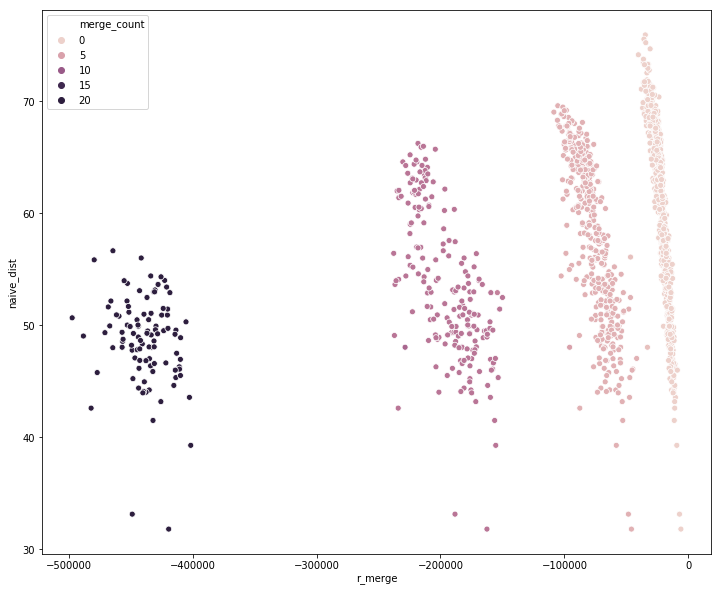

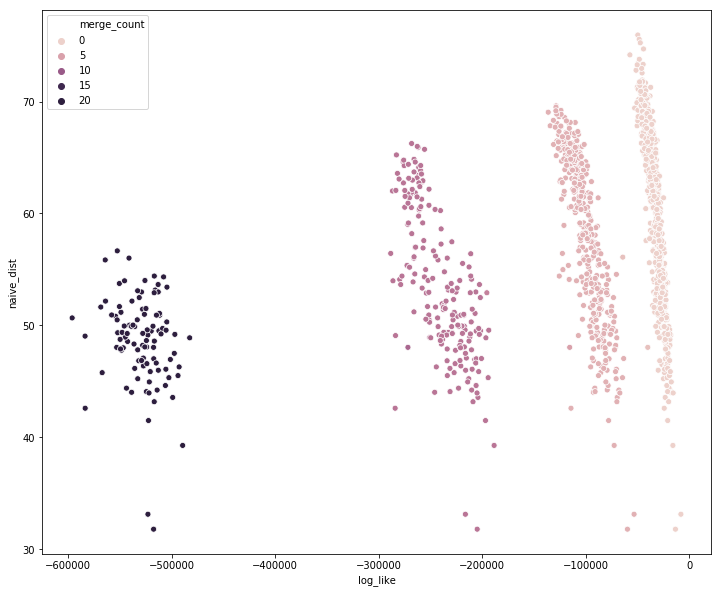

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
ax = sns.scatterplot(data=all_sim, x="r_merge", y="naive_dist", hue="merge_count")

fig = plt.figure(figsize=(12,10))
sns.scatterplot(data=all_sim, x="log_like", y="naive_dist", hue="merge_count")

In [7]:
from scipy.stats import pearsonr
print(pearsonr(all_sim["r_merge"], all_sim["naive_dist"])[0]**2 )
print(pearsonr(all_sim["log_like"], all_sim["naive_dist"])[0]**2)

0.1456476917979686
0.1452574946412466


/Users/massoudmaher/Documents/Code/scgenome/scg/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Prop correct -- Bayesian')

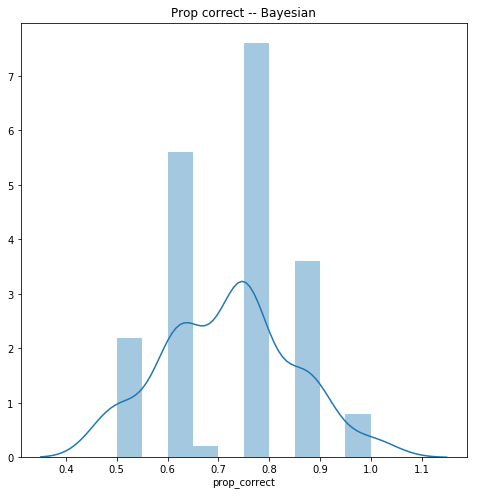

In [8]:
import seaborn as sns
fig = plt.figure(figsize=(8,8))
sns.distplot(sim["prop_correct"])
plt.title("Prop correct -- Bayesian")

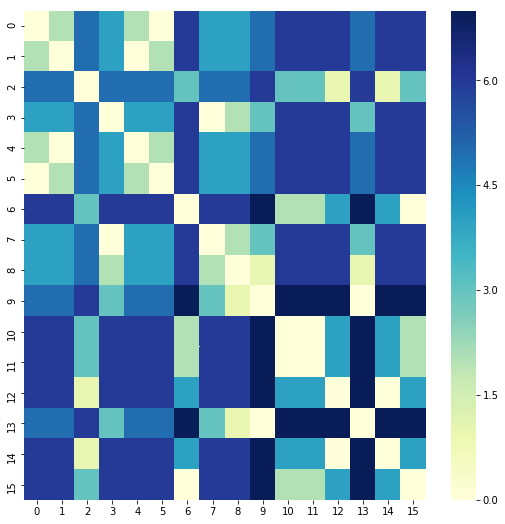

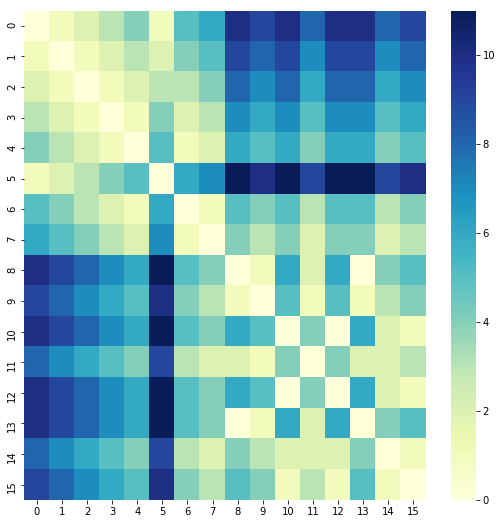

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ind=30
bhc_eg_pwd = sim["bhc_pwd"][ind]
naive_eg_pwd = sim["naive_pwd"][ind]

fig = plt.figure(figsize=(9,9))
sns.heatmap(bhc_eg_pwd, cmap="YlGnBu")

fig = plt.figure(figsize=(9,9))
sns.heatmap(naive_eg_pwd, cmap="YlGnBu")
#ax = plt.imshow(bhc_eg_pwd)
#ax = plt.gca()
#ax = ax.set_xticks(range(bhc_eg_pwd.shape[0]))
#ax = ax.set_yticks(range(bhc_eg_pwd.shape[0]))

In [108]:
df = pd.DataFrame({'col1': {0: 'a', 1: 'b', 2: 'c'},
                   'col2': {0: 1, 1: 3, 2: 5},
                   'col3': {0: 2, 1: 4, 2: 6},
                   'col4': {0: 3, 1: 6, 2: 2},
                   'col5': {0: 7, 1: 2, 2: 3},
                   'col6': {0: 2, 1: 9, 2: 5},
             
                  })
df1 = pd.DataFrame(np.array(
    [[1.1,1,1,1,1.1,2],
     [3.1,3,3,3.1,3,4],
     [5.1,5.1,5,5,5,6]]
))
df2 = df1+10

df = pd.concat([df1, df2], keys=('df1','df2'))
display(df)
df.xs("df1").iloc[0,0] = 69
display(df)
df.stack().reset_index()

0     1     2     3     4     5
df1 0   1.1   1.0   1.0   1.0   1.1   2.0
    1   3.1   3.0   3.0   3.1   3.0   4.0
    2   5.1   5.1   5.0   5.0   5.0   6.0
df2 0  11.1  11.0  11.0  11.0  11.1  12.0
    1  13.1  13.0  13.0  13.1  13.0  14.0
    2  15.1  15.1  15.0  15.0  15.0  16.0

0     1     2     3     4     5
df1 0  69.0   1.0   1.0   1.0   1.1   2.0
    1   3.1   3.0   3.0   3.1   3.0   4.0
    2   5.1   5.1   5.0   5.0   5.0   6.0
df2 0  11.1  11.0  11.0  11.0  11.1  12.0
    1  13.1  13.0  13.0  13.1  13.0  14.0
    2  15.1  15.1  15.0  15.0  15.0  16.0

,level_0,level_1,level_2,0
0,df1,0,0,69.0
1,df1,0,1,1.0
2,df1,0,2,1.0
3,df1,0,3,1.0
4,df1,0,4,1.1
5,df1,0,5,2.0
6,df1,1,0,3.1
7,df1,1,1,3.0
8,df1,1,2,3.0
9,df1,1,3,3.1
